# Análise de sentimento - base IMDB

## Segundo modelo

O IMDb (Internet Movie Database) é uma plataforma online que reúne um vasto banco de dados com informações sobre filmes, séries, jogos e tudo relacionado ao mundo do entretenimento. O site oferece detalhes completos sobre elenco, produção, sinopse e a avaliação das obras.

Foi utilizado um conjunto de dados disponível no site do Keras, que contém 25000 comentários sobre os filmes para treino e teste, e que foram rotuladas por sentimento (0 - Negativo/1 - Positivo), as resenhas sofreram um pré-processamento e cada uma delas foi codificada em uma lista de índices de palavras, que estão em números inteiros. Para maior conveniência, as palavras são codificadas de acordo com sua frequência dentro da base de dados, sendo que o número 3, equivale a 3ª palavra que mais aparece na base. 

Etapas:

- Carregar dados
- Definir modelo Keras
- Compilar modelo Keras
- Ajustar (fit) modelo Keras
- Avaliar (evalute) modelo Keras
- Faça previsões (predict)

## Carregar dados

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

Link do Dataset do IMDb no Keras: https://keras.io/api/datasets/imdb/

In [3]:
data = keras.datasets.imdb

(x_train, y_train), (x_test, y_test) = data.load_data()

In [4]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [5]:
x_test.shape, y_test.shape


((25000,), (25000,))

Abaixo está o índice de palavras que mais aparecem no Dataset:

In [6]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [7]:
len(x_train[0])

218

In [8]:
y_train[:5]

array([1, 0, 0, 1, 0])

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([12500, 12500]))

O `word_index` indica a relação da posição de cada palavra no Dataset, nota-se que há quase 90 mil palavras diferentes na base.

Abaixo, realizamos um loop for para descobrir qual era a palavra que mais aparecia na base e também o contador de caractere de cada texto.

In [10]:
word_index = data.get_word_index()
# word_index

In [11]:
len(word_index)

88584

In [12]:
word_index["the"]

1

In [13]:
for chave, valor in word_index.items():
    if valor == 1:
        print(chave)

the


In [14]:
for review in x_train[:5]:
    print(len(review))

218
189
141
550
147


No contexto de processamento de linguagem natural e análise de dados de texto, como no projeto com o dataset do IMDB, um "token" refere-se a uma unidade individual de dados ou palavra. Na tokenização, o texto é dividido em tais unidades (tokens), que podem ser palavras, caracteres ou subpalavras. Este processo é fundamental para transformar o texto bruto em uma forma que os modelos de machine learning podem entender e processar. Por exemplo, uma frase é dividida em palavras ou partes menores, e cada uma dessas partes é tratada como um token único.

Considere a frase "Aprendendo processamento de linguagem natural". Na tokenização, esta frase seria dividida em tokens individuais. Cada palavra representa um token:

- Token 1: "Aprendendo"
- Token 2: "processamento"
- Token 3: "de"
- Token 4: "linguagem"
- Token 5: "natural"

Neste exemplo, a frase original é decomposta em palavras isoladas, cada uma considerada um token. 

Um exemplo onde um token não é necessariamente uma palavra pode ser encontrado na tokenização baseada em caracteres ou sílabas. Por exemplo, na frase "Incrível", a tokenização por sílabas resultaria nos tokens "In", "crí", "vel". Aqui, cada sílaba é tratada como um token distinto, ao invés de cada palavra inteira. Este tipo de tokenização pode ser útil em tarefas de processamento de linguagem natural que e

- PAD é o token usado para preenchimento. Nós preenchemos todas as sequências para o mesmo comprimento, que é o comprimento da sequência mais longa.
- START é o token usado para marcar o início de uma sequência.
- UNK é o token usado para marcar palavras desconhecidas (palavras que não estão no vocabulário).
- UNUSED é o token usado para preencher as posições não utilizadas em uma sequência.

In [15]:
word_index = {chave: (valor + 3) for chave, valor in word_index.items()}

In [16]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


In [17]:
for chave, valor in word_index.items():
    if valor == 1:
        print(chave)

<START>


A função `decode_review`decodifica uma resenha que está representada como uma lista de números inteiros (tokens) e a converte de volta para texto legível.

Para fazer com que o texto seja retornado, passe uma lsita de números inteiros que representem palavras codificadas, e após, passe o índice de palavras em um dicionário para retornar o texto. Caso alguma palavra não seja encontrada no índice, ela será substituída por `<UNK>`.

In [18]:
from funcoes_auxiliares import decode_review

decode_review(x_train[0], word_index)

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

A função `print_review` retorna um texto de acordo com o número de caracteres limite na tela, para a função ser ativada, passe o texto que deverá ser imprimido e passe o `width`, que será o número de caracteres antes da quebra da linha, que por padrão, é 50. 

In [19]:
from funcoes_auxiliares import print_review

print_review(decode_review(x_train[0], word_index))


<START> this film was just brilliant casting
location scenery story direction everyone's really
suited the part they played and you could just
imagine being there robert redford's is an amazing
actor and now the same being director norman's
father came from the same scottish island as
myself so i loved the fact there was a real
connection with this film the witty remarks
throughout the film were great it was just
brilliant so much that i bought the film as soon
as it was released for retail and would recommend
it to everyone to watch and the fly fishing was
amazing really cried at the end it was so sad and
you know what they say if you cry at a film it
must have been good and this definitely was also
congratulations to the two little boy's that
played the part's of norman and paul they were
just brilliant children are often left out of the
praising list i think because the stars that play
them all grown up are such a big profile for the
whole film but these children are amazing and
sho

In [20]:
print_review(decode_review(x_train[3], word_index))

<START> the scots excel at storytelling the
traditional sort many years after the event i can
still see in my mind's eye an elderly lady my
friend's mother retelling the battle of culloden
she makes the characters come alive her passion is
that of an eye witness one to the events on the
sodden heath a mile or so from where she lives br
br of course it happened many years before she was
born but you wouldn't guess from the way she tells
it the same story is told in bars the length and
breadth of scotland as i discussed it with a
friend one night in mallaig a local cut in to give
his version the discussion continued to closing
time br br stories passed down like this become
part of our being who doesn't remember the stories
our parents told us when we were children they
become our invisible world and as we grow older
they maybe still serve as inspiration or as an
emotional reservoir fact and fiction blend with
aspiration role models warning stories archetypes
magic and mystery br br my n

O `pad_sequences` é uma função que trunca sequências muito longas, ou preenche sequências curtas com zeros, ela é utilizada para padronizar o tamanho de sequências em tarefas de Deep Learning. Sendo útil que as entradas neste modelo precisam ter o mesmo tamanho, contudo, em várias aplicações como esta, os textos tem o comprimento em caracteres distintos, como visto no:

```python
for review in x_train[:5]:
    print(len(review))

https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

In [21]:
x_train = keras.utils.pad_sequences(
    x_train,
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

x_test = keras.utils.pad_sequences(
    x_test,
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)


In [22]:
print_review(decode_review(x_train[0], word_index))


<START> this film was just brilliant casting
location scenery story direction everyone's really
suited the part they played and you could just
imagine being there robert redford's is an amazing
actor and now the same being director norman's
father came from the same scottish island as
myself so i loved the fact there was a real
connection with this film the witty remarks
throughout the film were great it was just
brilliant so much that i bought the film as soon
as it was released for retail and would recommend
it to everyone to watch and the fly fishing was
amazing really cried at the end it was so sad and
you know what they say if you cry at a film it
must have been good and this definitely was also
congratulations to the two little boy's that
played the part's of norman and paul they were
just brilliant children are often left out of the
praising list i think because the stars that play
them all grown up are such a big profile for the
whole film but these children are amazing and
sho

In [23]:
print_review(decode_review(x_train[3], word_index))

<START> the scots excel at storytelling the
traditional sort many years after the event i can
still see in my mind's eye an elderly lady my
friend's mother retelling the battle of culloden
she makes the characters come alive her passion is
that of an eye witness one to the events on the
sodden heath a mile or so from where she lives br
br of course it happened many years before she was
born but you wouldn't guess from the way she tells
it the same story is told in bars the length and
breadth of scotland as i discussed it with a
friend one night in mallaig a local cut in to give
his version the discussion continued to closing
time br br stories passed down like this become
part of our being who doesn't remember the stories
our parents told us when we were children they
become our invisible world and as we grow older
they maybe still serve as inspiration or as an
emotional reservoir fact and fiction blend with
aspiration role models warning stories archetypes
magic and mystery br br my n

In [24]:
for review in x_train[:5]:
    print(len(review))

256
256
256
256
256


In [25]:
x_train.shape

(25000, 256)

## Definir modelo Keras

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

O Embedding no Keras funciona como um tradutor que transforma números, cada um representando uma palavra, em vetores de números reais em um espaço multidimensional. Cada vetor representa uma palavra de maneira única, capturando nuances de seu significado e relação com outras palavras. Por exemplo, na representação vetorial, palavras com significados semelhantes, como "feliz" e "alegre", ficarão próximas no espaço vetorial. Esses vetores são aprendidos durante o treinamento do modelo, permitindo que a máquina compreenda e processe textos de maneira mais eficaz. Isso é fundamental em tarefas como análise de sentimentos ou tradução automática, onde a compreensão do contexto e das nuances das palavras é crucial.

![exemplo.png](../imagens/exemplo.png)

### RNNs

Uma Rede Neural Recorrente (RNN) é um tipo de rede neural projetada para processar sequências, como dados de séries temporais ou texto. RNNs são únicas porque mantêm uma memória interna de entradas anteriores, permitindo-lhes capturar informações sobre a história da sequência. No entanto, RNNs padrão frequentemente têm dificuldade em aprender dependências de longo alcance devido ao problema do gradiente desaparecendo.

LSTM, ou Memória de Longo e Curto Prazo, é um tipo especial de RNN que aborda essa questão. Ela inclui mecanismos chamados portões que regulam o fluxo de informações, tornando-a capaz de lembrar e utilizar informações ao longo de sequências muito mais longas. Isso torna as LSTMs mais eficazes para tarefas onde entender o contexto estendido é crucial.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [26]:
model = keras.Sequential()

model.add(keras.layers.InputLayer(shape=(256,)))

model.add(keras.layers.Embedding(len(word_index), 64))

model.add(keras.layers.LSTM(64))

model.add(keras.layers.Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ embedding (Embedding)         │ (None, 256, 64)       │    5,669,632 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm (LSTM)                   │ (None, 64)            │       33,024 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 2)             │          130 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 5,702,786 (21.75 MB)

 Trainable params: 5,702,786 (21.75 MB)

 Non-trainable params: 0 (0.00 B)

## Compilar modelo Keras

O `Adam` é um otimizador utilizado para treinar redes neurais, onde utiliza médias móveis de gradientes passados para ajustar a taxa de aprendizado, e se adapta automaticamente a diferentes parâmetros do modelo.

O `SparseCategoricalCrossentropy` é uma função de perda utilizada em problemas de classificação multiclasse quandon os rótulos são números inteiros, enquanto o `SparseCategoricalAccuracy` é uma métrica usada para medir a precisão em problemas de classificação multiclasse.

Para tentar otimizar os resultados do treinamento, reduzimos a taxa de aprendizagem para `0.001`, equivalente a `1E-4` no `Adam`.

In [27]:
optimizer = keras.optimizers.Adam(1E-4)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer = optimizer, loss=loss, metrics=[metric])

## Fit modelo Keras

O método `model.fit` realiza o treinamento do modelo de rede neural no conjunto de dados fornecido, ajustando os pesos da rede para minimizar a função de perda e melhorar a performance na tarefa.

O `x_train` e o `y_train` são os dados de entrada para treinar o modelo, o `epochs` indica a quantidade de vezes que ele passará pelos dados de treinamento, o `batch_size` processará os dados em lotes de 512 amostras antes de atualizar os pesos, enquanto o `validation_split` reserva uma poercentagem de dados para a validação.

Por fim, o `verbose` exibe detalhes do treinamento durante cada `epoch`.

In [28]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 410ms/step - loss: 0.6933 - sparse_categorical_accuracy: 0.4990 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.4966
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 427ms/step - loss: 0.6929 - sparse_categorical_accuracy: 0.5073 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5072
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 429ms/step - loss: 0.6925 - sparse_categorical_accuracy: 0.5111 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.5092
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 418ms/step - loss: 0.6920 - sparse_categorical_accuracy: 0.5222 - val_loss: 0.6926 - val_sparse_categorical_accuracy: 0.5126
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 488ms/step - loss: 0.6909 - sparse_categorical_accuracy: 0.5267 - val_loss: 0.6921 - val_sparse_categorical_accuracy: 0.5152
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 437ms/step - loss: 0.6893 - sparse_categorical_accuracy: 0.5198 - val_loss: 0.6754 - val_sparse_categorical_accuracy: 0.587

## Evaluate modelo Keras

O `model.evaluate` avalia a acurácia e a perda do modelo

In [29]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 0.7367 - sparse_categorical_accuracy: 0.8135


[0.7370467782020569, 0.8139200210571289]

## Predict modelo Keras

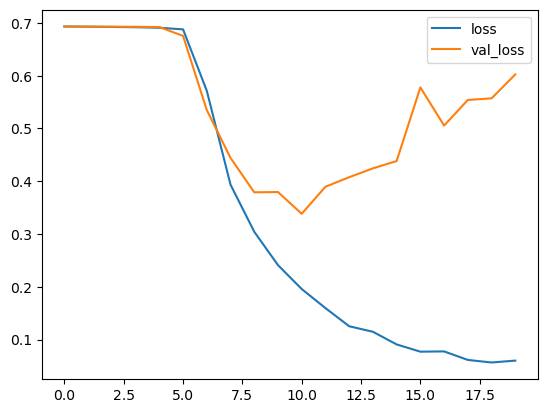

In [30]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

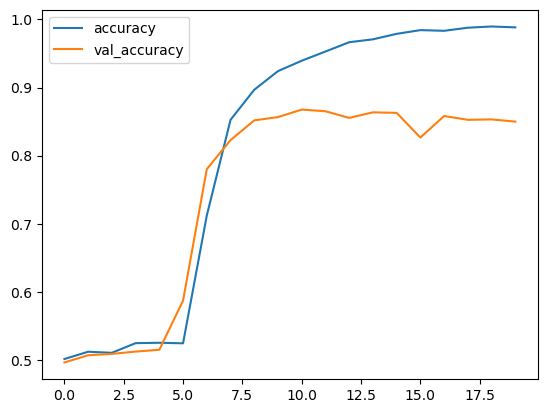

In [31]:
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

Este loop for analisa e faz a previsão para o primeiro exemplo do conjunto de teste.

O `label` indica qual foi o rótulo verdadeiro da resenha dentro da base de dados, o `Prediction (sigmoid)` retorna a previsão do modelo sendo positivo ou negativo, enquanto na `Prediction`, o `argmax` é utilizado para a classe mais próxima de 1. Neste caso, o 0 esteve mais próximo de 1, o que indica que o modelo acertou a previsão.

In [53]:
for i in range(1):
    print_review(decode_review(x_test[i], word_index), width=80)
    print("Label:", y_test[i])
    print("Prediction (sigmoid): ", model.predict(np.expand_dims(x_test[i], axis=0), verbose=0).flatten())
    print("Prediction: ", np.argmax(model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)))

    print()

<START> please give this one a miss br br kristy swanson and the rest of the
cast rendered terrible performances the show is flat flat flat br br i don't
know how michael madison could have allowed this one on his plate he almost
seemed to know this wasn't going to work out and his performance was quite
lacklustre so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

In [33]:
print_review(decode_review(x_test[8], word_index), width=80)

<START> hollywood had a long love affair with bogus arabian nights tales but few
of these products have stood the test of time the most memorable were the jon
hall maria montez films which have long since become camp this one is filled
with dubbed songs anachronistic slang and slapstick it's a truly crop of corn
and pretty near intolerable today it was nominated for its imaginative special
effects which are almost unnoticeable in this day and age consisting mainly of
trick photography the only outstanding positive feature which survives is its
beautiful color and clarity sad to say of the many films made in this genre few
of them come up to alexander korda's original thief of baghdad almost any other
arabian nights film is superior to this one though it's a loser <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

## Inserindo nossos reviews no modelo

Estes são os reviews customizáveis que foram utilizados no modelo, fique a vontade caso queira adicionar um review de sua escolha para testar este modelo.

In [34]:
positive_review = "The Grand Adventure is an absolute masterpiece! From the breathtaking cinematography to the deeply moving performances, this film captures the essence of storytelling at its finest. The script is beautifully written, with emotional depth and sharp dialogue that keeps you engaged from start to finish. The lead actor delivers a career defining performance, making every moment feel real and heartfelt. The soundtrack perfectly complements the visuals, adding another layer of immersion. If you're looking for a movie that inspires, entertains, and stays with you long after the credits roll, this is it. A must watch!"

print_review(positive_review)

The Grand Adventure is an absolute masterpiece!
From the breathtaking cinematography to the deeply
moving performances, this film captures the
essence of storytelling at its finest. The script
is beautifully written, with emotional depth and
sharp dialogue that keeps you engaged from start
to finish. The lead actor delivers a career
defining performance, making every moment feel
real and heartfelt. The soundtrack perfectly
complements the visuals, adding another layer of
immersion. If you're looking for a movie that
inspires, entertains, and stays with you long
after the credits roll, this is it. A must watch!


In [35]:
positive_review2 = "Echoes of Tomorrow is a breathtaking cinematic experience that masterfully blends emotion, mystery, and stunning visuals. The storytelling is captivating, keeping you on the edge of your seat with unexpected twists and deeply relatable characters. The directors vision is evident in every beautifully crafted scene, and the performances are nothing short of outstanding. The soundtrack enhances every moment, making it an emotional rollercoaster that lingers in your mind long after the credits roll. This is a must see for anyone who loves thought provoking, beautifully executed films."

print_review(positive_review2)

Echoes of Tomorrow is a breathtaking cinematic
experience that masterfully blends emotion,
mystery, and stunning visuals. The storytelling is
captivating, keeping you on the edge of your seat
with unexpected twists and deeply relatable
characters. The directors vision is evident in
every beautifully crafted scene, and the
performances are nothing short of outstanding. The
soundtrack enhances every moment, making it an
emotional rollercoaster that lingers in your mind
long after the credits roll. This is a must see
for anyone who loves thought provoking,
beautifully executed films.


In [36]:
negative_review = "The Grand Adventure is a disappointing mess that fails to deliver on its promising premise. The pacing is painfully slow, dragging on with unnecessary scenes that add nothing to the plot. The characters are one dimensional, and their motivations feel forced rather than organic. While the cinematography is decent, it's not enough to save the film from its predictable and uninspired storyline. Even the performances feel lackluster, as if the actors themselves weren’t convinced by the script. Overall, this is a forgettable experience that lacks the emotional impact it desperately tries to achieve. Skip it."

print_review(negative_review)

The Grand Adventure is a disappointing mess that
fails to deliver on its promising premise. The
pacing is painfully slow, dragging on with
unnecessary scenes that add nothing to the plot.
The characters are one dimensional, and their
motivations feel forced rather than organic. While
the cinematography is decent, it's not enough to
save the film from its predictable and uninspired
storyline. Even the performances feel lackluster,
as if the actors themselves weren’t convinced by
the script. Overall, this is a forgettable
experience that lacks the emotional impact it
desperately tries to achieve. Skip it.


In [37]:
negative_review2 = "Echoes of Tomorrow tries to be profound but ends up feeling pretentious and hollow. The pacing is inconsistent, with long, drawn out scenes that add little to the overall narrative. The characters lack depth, making it difficult to truly connect with their struggles. While the cinematography is visually appealing, it feels like style over substance, with the film relying too much on aesthetics rather than a compelling story. The so called twists are predictable, and by the end, it feels like a wasted two hours. Definitely not worth the hype."

print_review(negative_review)

The Grand Adventure is a disappointing mess that
fails to deliver on its promising premise. The
pacing is painfully slow, dragging on with
unnecessary scenes that add nothing to the plot.
The characters are one dimensional, and their
motivations feel forced rather than organic. While
the cinematography is decent, it's not enough to
save the film from its predictable and uninspired
storyline. Even the performances feel lackluster,
as if the actors themselves weren’t convinced by
the script. Overall, this is a forgettable
experience that lacks the emotional impact it
desperately tries to achieve. Skip it.


O `encode_review` é responsável por remover pontuações e converter as palavras em índices numéricos com base no`word_index`.

A função elimina todas as pontuações e converte o texto para letras minúsculas, o que garante consistência para que o `word_index` mapeie as palavras de acordo com os textos acima. Caso a palavra não seja encontrada no dicionária, ela retornará 2, indicando um token de palavras desconhecidas `<UNK>`.

In [38]:
from funcoes_auxiliares import encode_review

encode_review(positive_review, word_index)

[4,
 1758,
 1154,
 9,
 35,
 1557,
 991,
 39,
 4,
 2877,
 627,
 8,
 4,
 1685,
 728,
 354,
 14,
 22,
 2346,
 4,
 3320,
 7,
 2804,
 33,
 94,
 1885,
 4,
 229,
 9,
 1293,
 398,
 19,
 921,
 1137,
 5,
 2455,
 414,
 15,
 941,
 25,
 3953,
 39,
 380,
 8,
 1363,
 4,
 485,
 284,
 1545,
 6,
 611,
 7827,
 239,
 231,
 175,
 561,
 235,
 147,
 5,
 5348,
 4,
 816,
 950,
 16231,
 4,
 2057,
 2893,
 160,
 11236,
 7,
 19150,
 48,
 45401,
 267,
 18,
 6,
 20,
 15,
 10101,
 8583,
 5,
 2677,
 19,
 25,
 196,
 103,
 4,
 898,
 1686,
 14,
 9,
 12,
 6,
 215,
 106]

In [39]:
decode_review(encode_review(positive_review, word_index), word_index)


'the grand adventure is an absolute masterpiece from the breathtaking cinematography to the deeply moving performances this film captures the essence of storytelling at its finest the script is beautifully written with emotional depth and sharp dialogue that keeps you engaged from start to finish the lead actor delivers a career defining performance making every moment feel real and heartfelt the soundtrack perfectly complements the visuals adding another layer of immersion if youre looking for a movie that inspires entertains and stays with you long after the credits roll this is it a must watch'

In [40]:
decode_review(encode_review(positive_review2, word_index), word_index)


'echoes of tomorrow is a breathtaking cinematic experience that masterfully blends emotion mystery and stunning visuals the storytelling is captivating keeping you on the edge of your seat with unexpected twists and deeply relatable characters the directors vision is evident in every beautifully crafted scene and the performances are nothing short of outstanding the soundtrack enhances every moment making it an emotional rollercoaster that lingers in your mind long after the credits roll this is a must see for anyone who loves thought provoking beautifully executed films'

In [41]:
decode_review(encode_review(negative_review, word_index), word_index)


'the grand adventure is a disappointing mess that fails to deliver on its promising premise the pacing is painfully slow dragging on with unnecessary scenes that add nothing to the plot the characters are one dimensional and their motivations feel forced rather than organic while the cinematography is decent its not enough to save the film from its predictable and uninspired storyline even the performances feel lackluster as if the actors themselves <UNK> convinced by the script overall this is a forgettable experience that lacks the emotional impact it desperately tries to achieve skip it'

In [42]:
decode_review(encode_review(negative_review2, word_index), word_index)


'echoes of tomorrow tries to be profound but ends up feeling pretentious and hollow the pacing is inconsistent with long drawn out scenes that add little to the overall narrative the characters lack depth making it difficult to truly connect with their struggles while the cinematography is visually appealing it feels like style over substance with the film relying too much on aesthetics rather than a compelling story the so called twists are predictable and by the end it feels like a wasted two hours definitely not worth the hype'

## Realizando o predict dos reviews criados

In [43]:
positive_review = keras.utils.pad_sequences(
    [encode_review(positive_review, word_index)],
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

negative_review = keras.utils.pad_sequences(
    [encode_review(negative_review, word_index)],
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

In [46]:
model.predict(positive_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0.11079695, 0.95122683]], dtype=float32)

In [47]:
model.predict(negative_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[0.87626916, 0.05636796]], dtype=float32)

In [48]:
positive_review2 = keras.utils.pad_sequences(
    [encode_review(positive_review2, word_index)],
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

negative_review2 = keras.utils.pad_sequences(
    [encode_review(negative_review2, word_index)],
    value=word_index["<PAD>"],
    padding="post",
    truncating="post",
    maxlen=256
)

In [49]:
model.predict(positive_review2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[0.11079588, 0.95122755]], dtype=float32)

In [50]:
model.predict(negative_review2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.87626606, 0.05636999]], dtype=float32)